# Project COSC 6324

**`Objective: Build a system to classify an object of a RGB image`**
 
## 1. Importing libraries and dataset

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

### Importing Data and labels

In [29]:
dataset=pd.read_csv("Data.csv")
y=pd.read_csv("classLabel.csv")

## 2. Preprocessing Procedures

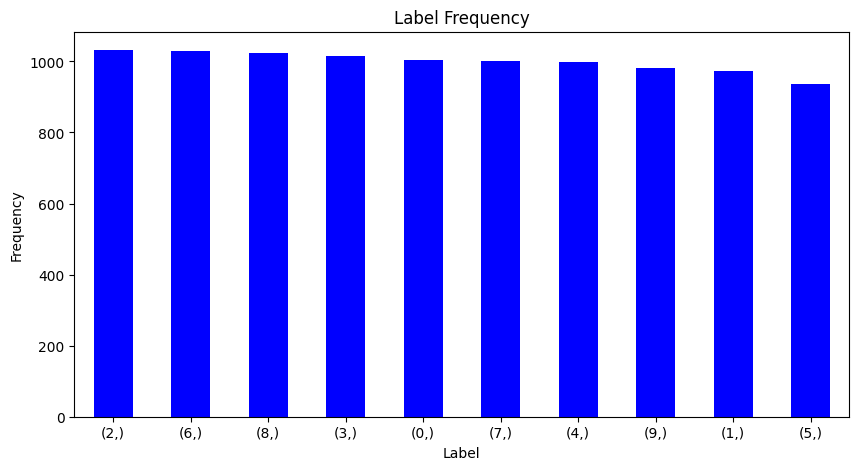

In [30]:
dataset.head()

label_freq = y[0:].value_counts()
# plot the series
label_freq.plot(kind='bar', title='Label Frequency', xlabel='Label', ylabel='Frequency', figsize=(10, 5), rot=0, color='blue', width=0.5)
plt.show()

In [31]:
dataset.shape

(9999, 3072)

### 2.1 Converting RGB Image into the grayscale image



The purpose of this function is to convert a dataset into a list of black and white images. It takes a dataset as input, where each row represents an RGB image, and processes each row to create a black and white version of the image.


In [32]:
import numpy as np
lst=[]
bw=[]
for i in range(len(dataset)):
    row = dataset.iloc[i]

    rgb_image = np.array(row).reshape(32, 32, 3)
    lst.append(rgb_image)
    bw_img = np.dot(rgb_image[...,:3], [0.2989, 0.5870, 0.1140])
    bw.append(bw_img)

bw = np.array(bw)

### 2.2 Dividing the data set into two sets

In [33]:
#Dividing the dataset into training and testing set
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(bw, test_size=0.3, random_state=42)
y_train, y_test = train_test_split(y, test_size=0.3, random_state=42)

x_train = x_train/255
x_test = x_test/255

y_train_one_hot = to_categorical(y_train, num_classes=10)
y_test_one_hot = to_categorical(y_test, num_classes=10)

### 2.3 Building the Convolutional Neural Network

#### `About the architecture`

1. **Feature extraction**
    - **Number of Neurons in Input Layer**: The input layer consists of a single-channel image, with the number of neurons corresponding to the number of pixels in the image.

    - **Number of Convolution and Pooling Layers**: There are 4 convolutional layers and 4 corresponding max-pooling layers.

    - **Number of Features**: The last max-pooling layer before the fully connected layers produces 512 feature maps.

2. **Classification**

    - **Number of Neurons in Classification Input Layer**: The classification input layer consists of 512 neurons.

    - **Number of Layers for Classification**: There are 2 fully connected layers for the classification task.

    - **Number of Neurons in the Output Layer**: The output layer has 10 neurons, representing the 10 classes for classification.


In [34]:

model = models.Sequential()

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(512, (3, 3), activation='relu',padding='same'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 30, 30, 64)        640       
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 15, 15, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 15, 15, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPooli  (None, 7, 7, 128)         0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 7, 7, 256)         295168    
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 3, 3, 256)        

### 2.3 Compiling the model and fitting it
 ##### Using the adam optimizer and categorical crossentropy and accuracy as the metric

In [35]:
from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping

# Learning rate scheduler function
def schedule(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

# Define the learning rate scheduler
lr_scheduler = LearningRateScheduler(schedule)

# Define early stopping criteria
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model with both learning rate scheduler and early stopping
history = model.fit(x_train, y_train_one_hot, 
                    epochs=10, 
                    batch_size=32, 
                    validation_split=0.2,
                    callbacks=[lr_scheduler, early_stopping])


Epoch 1/10


175/175 [==============================] - 40s 214ms/step - loss: 2.1426 - accuracy: 0.1747 - val_loss: 1.9344 - val_accuracy: 0.2564 - lr: 0.0010
Epoch 2/10
175/175 [==============================] - 42s 239ms/step - loss: 1.8990 - accuracy: 0.2733 - val_loss: 1.9246 - val_accuracy: 0.2786 - lr: 0.0010
Epoch 3/10
175/175 [==============================] - 37s 208ms/step - loss: 1.7616 - accuracy: 0.3283 - val_loss: 1.6768 - val_accuracy: 0.3850 - lr: 0.0010
Epoch 4/10
175/175 [==============================] - 45s 260ms/step - loss: 1.6263 - accuracy: 0.3952 - val_loss: 1.6586 - val_accuracy: 0.3779 - lr: 0.0010
Epoch 5/10
175/175 [==============================] - 48s 272ms/step - loss: 1.5247 - accuracy: 0.4345 - val_loss: 1.6070 - val_accuracy: 0.4079 - lr: 0.0010
Epoch 6/10
175/175 [==============================] - 46s 264ms/step - loss: 1.4300 - accuracy: 0.4676 - val_loss: 1.5225 - val_accuracy: 0.4464 - lr: 9.0484e-04
Epoch 7/10
175/175 [==============================] - 45s 2

### Plotting the graph for validation loss

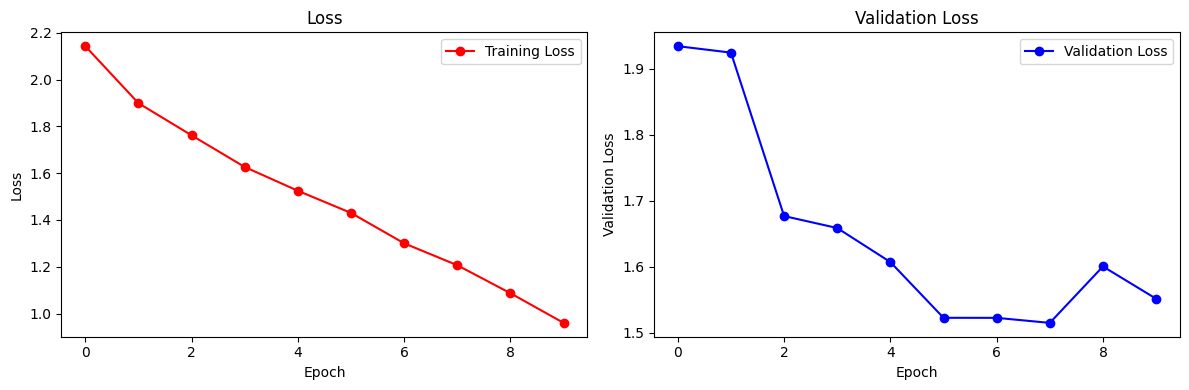

In [36]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], color='red', label='Training Loss', marker='o')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['val_loss'], color='blue', label='Validation Loss', marker='o')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()

plt.tight_layout()
plt.show()

### 2.5 Testing Procedure
Evaluating the classifier by the accuracy measurement on X_test.

$$
ACC_{D_{test}} = \frac{1}{|D_{test}|} \sum_{i=1}^{|D_{test}|} L(\hat{y}_i, y_i)
$$

where $\hat{y}_i$ is the assigned class label by the classifier and $y_i$ is the true class label of a data instance $x_i$ in $D_{test}$, and $|D_{test}|$ is the number of data instances in $D_{test}$.

$L(\hat{y}_i, y_i) = \begin{cases} 1 & \text{if } \hat{y}_i = y_i \\ 0 & \text{if } \hat{y}_i \neq y_i \end{cases}$


In [37]:
# Predictions
y_pred_probs = model.predict(x_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)

# Format predictions as DataFrame
y_pred_labels = pd.DataFrame(y_pred_labels, columns=["Predicted_Label"])

# Align true labels with predicted labels
y_test, y_pred_labels = y_test.align(y_pred_labels, axis=1)

# Reset index for better presentation
y_test = y_test.reset_index(drop=True)
y_pred_labels = y_pred_labels.reset_index(drop=True)

# Model evaluation
loss, accuracy = model.evaluate(x_test, y_test_one_hot)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy * 100:.2f}%")


94/94 [==============================] - 3s 29ms/step - loss: 1.5630 - accuracy: 0.4867
Loss: 1.5630030632019043
Accuracy: 48.67%
